<a href="https://colab.research.google.com/github/brunokobi/Bootcamp_BairesDev/blob/main/C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Desafio 3: Cálculo de Métricas de Avaliação de Aprendizado

## 📝 Descrição do Desafio
Neste projeto, você irá calcular as principais métricas utilizadas para avaliar modelos de classificação de dados.
Neste projeto, você irá calcular as principais métricas utilizadas para avaliar modelos de classificação de dados, com o objetivo de aplicar essas métricas a um modelo treinado no dataset Iris 🌸. Este é um dataset amplamente utilizado em aprendizado de máquina e contém 150 amostras de flores de íris, distribuídas em 3 classes, com 4 características cada: comprimento e largura da sépala e da pétala.
 As métricas incluem:  
- **Acurácia**  
- **Sensibilidade (Recall)**  
- **Especificidade**  
- **Precisão**  
- **F-score**  

Para implementar as funções de cálculo, utilize os métodos e fórmulas correspondentes apresentadas na **Tabela 1**.

### 🟢 Matriz de Confusão  
Os valores de VP (Verdadeiros Positivos), VN (Verdadeiros Negativos), FP (Falsos Positivos) e FN (Falsos Negativos) serão necessários para os cálculos. Você pode escolher arbitrariamente uma matriz de confusão, já que o objetivo principal é compreender o funcionamento das métricas.

---

## 📋 Tabela 1: Fórmulas das Métricas de Avaliação  
| Métrica           | Fórmula                                               | Descrição                             |
|--------------------|-------------------------------------------------------|---------------------------------------|
| **Acurácia**       | \((VP + VN) / (VP + VN + FP + FN)\)                   | Proporção de previsões corretas       |
| **Precisão (P)**   | \(VP / (VP + FP)\)                                    | Porcentagem de positivos corretos     |
| **Sensibilidade (S)** | \(VP / (VP + FN)\)                                 | Habilidade de identificar positivos   |
| **Especificidade** | \(VN / (VN + FP)\)                                    | Habilidade de identificar negativos   |
| **F-score**        | \(2 \cdot (P \cdot S) / (P + S)\)                     | Média harmônica de Precisão e Recall  |

> **Legenda:**  
> - **VP:** Verdadeiros Positivos  
> - **VN:** Verdadeiros Negativos  
> - **FP:** Falsos Positivos  
> - **FN:** Falsos Negativos  

---

⚡ **Dica**: Entender e implementar as métricas será essencial para avaliar a eficácia de modelos de classificação e tomar decisões com base nos resultados obtidos.

🚀 Mãos à obra!


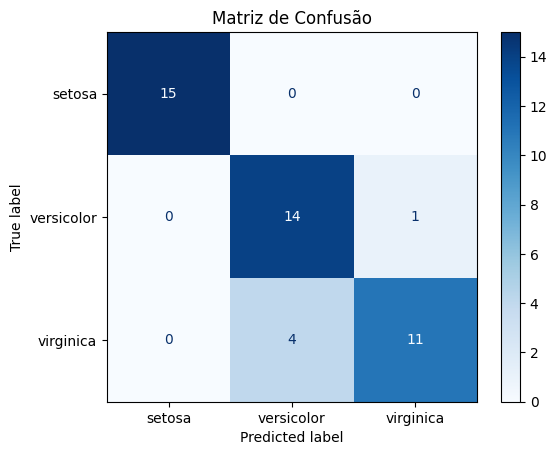

Classe,Acurácia,Precisão,Recall,Especificidade,F-score
setosa,1.000000,1.000000,1.000000,1.000000,1.000000
versicolor,0.888889,0.777778,0.933333,0.866667,0.848485
virginica,0.888889,0.916667,0.733333,0.966667,0.814815


In [12]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Carregando o dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Treinando um modelo de classificação (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

# Função para calcular as métricas
def calculate_metrics(conf_matrix):
    metrics = []
    for i in range(conf_matrix.shape[0]):
        VP = conf_matrix[i, i]
        FN = sum(conf_matrix[i, :]) - VP
        FP = sum(conf_matrix[:, i]) - VP
        VN = conf_matrix.sum() - (VP + FN + FP)

        accuracy = (VP + VN) / (VP + VN + FP + FN)
        precision = VP / (VP + FP) if (VP + FP) > 0 else 0
        recall = VP / (VP + FN) if (VP + FN) > 0 else 0
        specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
        f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics.append({
            "Classe": iris.target_names[i],
            "Acurácia": accuracy,
            "Precisão": precision,
            "Recall": recall,
            "Especificidade": specificity,
            "F-score": f_score
        })
    return metrics

# Calculando as métricas para cada classe
metrics_per_class = calculate_metrics(conf_matrix)

# Exibindo as métricas como uma tabela com bordas e cor de fonte preta no cabeçalho
df_metrics = pd.DataFrame(metrics_per_class)
df_metrics.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '1px solid black')]},
     {'selector': 'th', 'props': [('border', '1px solid black'),
                                 ('background-color', '#f2f2f2'),
                                 ('color', 'black')]},  # Cor preta no texto do cabeçalho
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
).hide(axis="index")  # Ocultar índice da tabela
